In [1]:
import numpy as np
import os
import itertools
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Data preparation
Dogs vs cats training set

In [2]:
#os.chdir('dogsvscats')
print(os.getcwd())

C:\Users\jozee\Desktop\ML


In [ ]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    
    # we are stripping the dataset a little, so the training goes faster
    os.chdir('train')
    print(os.getcwd())
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, '../train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, '../train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, '../valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, '../valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, '../test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, '../test/dog')
    

In [31]:
os.chdir('../')

In [3]:
print(os.getcwd())

C:\Users\jozee\Desktop\ML


In [5]:
train_path = 'data/dogs-vs-cats/train'
test_path = 'data/dogs-vs-cats/test'
valid_path = 'data/dogs-vs-cats/valid'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)
# you can specify classes=['cat', 'dog'], but IDG finds it itself from the name of the picture

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
imgs, labels = next(train_batches)
# just to check, imgs contain 10 images and labels coresponding 10 labels

In [10]:
imgs[1].shape

(224, 224, 3)

In [7]:
# This func will plot images in the form of a grid with 1 row and 10 columns (form tf website)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')  # usuwa osie, zeby samo zdjecie bylo widoczne
    plt.tight_layout() # brings the photos closer to each other
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

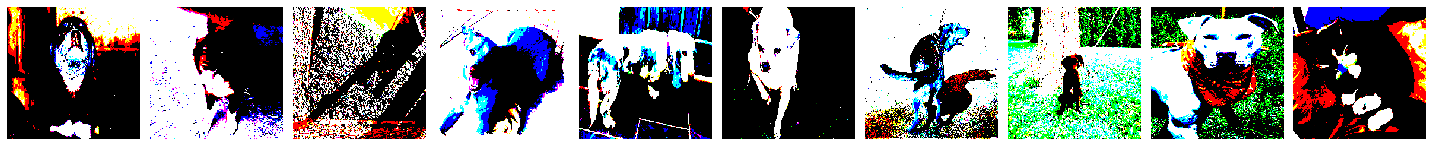

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [11]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # kernel_size is the dimension of the filter matrix, padding='same' - no padding, in input shape 3 means 3 color channels (RGB)
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(2, activation='softmax')
])

### MaxPool2D graphical presentatnion
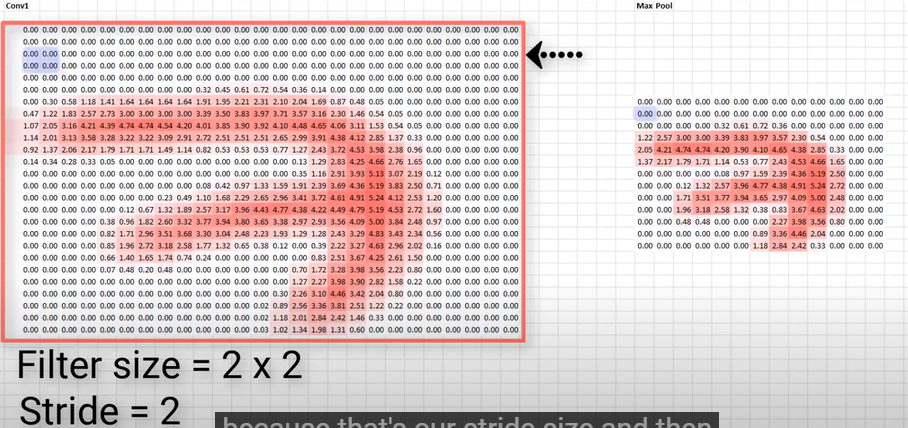

In [13]:
# stride is a jump downwards or sidewards
# softmax will give us probabilty!!

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metric=['accuracy'])

In [18]:
# You can also use binary_corssentropy, but you would have to have 1 output layer
# and the activation should be sigomid not softmax (its used for 2 classes only)

In [20]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 56s - loss: 0.0209 - val_loss: 1.2408
Epoch 2/10
100/100 - 56s - loss: 0.0093 - val_loss: 1.3120
Epoch 3/10
100/100 - 58s - loss: 0.0030 - val_loss: 1.3955
Epoch 4/10
100/100 - 57s - loss: 0.0017 - val_loss: 1.4638
Epoch 5/10
100/100 - 58s - loss: 0.0012 - val_loss: 1.5413
Epoch 6/10
100/100 - 58s - loss: 8.3966e-04 - val_loss: 1.6012
Epoch 7/10
100/100 - 58s - loss: 6.4906e-04 - val_loss: 1.6464
Epoch 8/10
100/100 - 58s - loss: 5.0810e-04 - val_loss: 1.7035
Epoch 9/10
100/100 - 58s - loss: 4.1871e-04 - val_loss: 1.7355
Epoch 10/10
100/100 - 58s - loss: 3.4979e-04 - val_loss: 1.7664


### Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

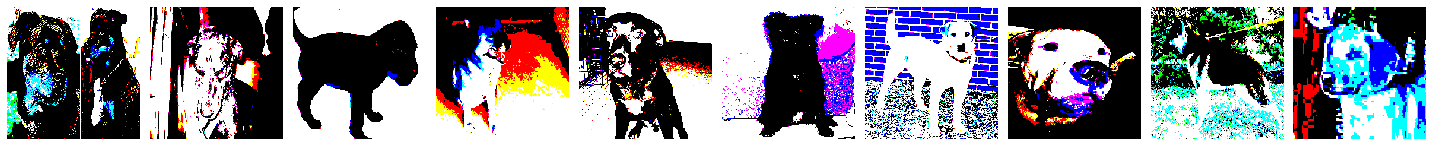

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [27]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [29]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
predictions = model.predict(test_batches, verbose=0)

In [32]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [37]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [17]:
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized CM')
    else:
        print('Confusion Matrix')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')  # to od wyswietlania cyferek w macierzy koloru
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
[[30 20]
 [18 32]]


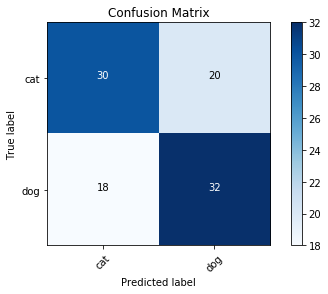

In [47]:
plot_confusion_matrix(cm, classes=['cat', 'dog'])

# Building Fine-tuned VGG16 model

In [4]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [5]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [74]:
vgg16_model.layers[:-1] # without the last layer

In [7]:
for layer in model.layers:
    layer.trainable = False

In [8]:
model.add(Dense(2,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

#### **Train the model**

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Train for 100 steps, validate for 20 steps
Epoch 1/5
100/100 - 269s - loss: 0.1225 - accuracy: 0.9540 - val_loss: 0.2426 - val_accuracy: 0.9450
Epoch 2/5
100/100 - 242s - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.2192 - val_accuracy: 0.9450
Epoch 3/5
100/100 - 233s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.2135 - val_accuracy: 0.9600
Epoch 4/5
100/100 - 256s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9550
Epoch 5/5
100/100 - 244s - loss: 9.6313e-04 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9550


## Prediction using fine-tuned VGG16 model

In [12]:
pred = model.predict(test_batches, verbose=0)

In [13]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=-1))

In [16]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix
[[48  2]
 [ 1 49]]


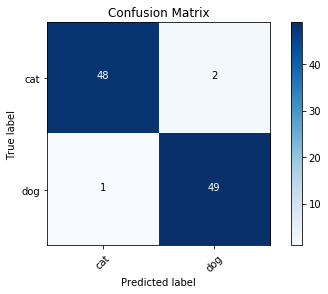

In [18]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)